#ASTR19 Final Project

1st Version: Circles every single detected object which makes the image plot messy. 

In [48]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

This code segment performs object detection and visualization on an astronomical image stored in a FITS file. It reads the FITS file, measures the spatially varying background, and subtracts this background from the image data. 

In [49]:
# Display plots in the notebook
%matplotlib inline

# Read the FITS file
hdulist = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = hdulist[0].data.byteswap().newbyteorder()  # Read and preprocess image data

# Measure a spatially varying background on the image
bkg = sep.Background(data)

# Subtract the background
data_sub = data - bkg


Using the SEP (Source Extractor in Python) library, it then extracts objects from the background-subtracted image using a detection threshold of 1.5σ. The code counts the number of detected objects and creates a plot of the background-subtracted image with red ellipses overlaid on each detected object, representing their approximate shapes and positions. Finally, it displays the plot inline in the notebook. This process enables astronomers to identify and analyze objects of interest in astronomical images.

Number of objects detected: 8636


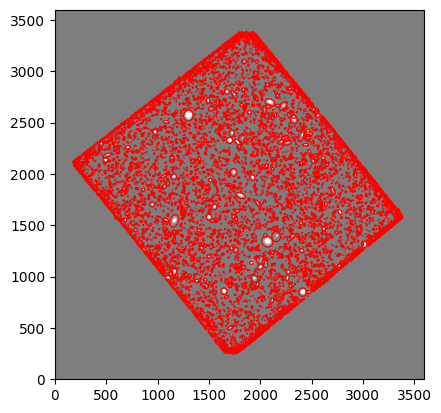

In [50]:

# Extract objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)  # Detect objects in the background-subtracted image

# How many objects were detected
print("Number of objects detected:", len(objects))

# Plot background-subtracted image
fig, ax = plt.subplots()  # Create a plot
m, s = np.mean(data_sub), np.std(data_sub)  # Calculate mean and standard deviation of the image data
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')  # Display the image

# Plot an ellipse for each object
for i in range(len(objects)):  # Iterate over detected objects
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),  # Create an ellipse for each object's position and shape
                width=6*objects['a'][i],  # Set width of ellipse
                height=6*objects['b'][i],  # Set height of ellipse
                angle=objects['theta'][i] * 180. / np.pi)  # Set angle of ellipse
    e.set_facecolor('none')  # Set the face color of the ellipse to none (transparent)
    e.set_edgecolor('red')  # Set the edge color of the ellipse to red
    ax.add_artist(e)  # Add the ellipse to the plot

# Show the plot
plt.show()  # Display the plot with detected objects highlighted


Version 1: Aperture Photometry

This code segment performs aperture photometry on the detected objects in an astronomical image. Using the SEP (Source Extractor in Python) library, it calculates the total flux within circular apertures of radius 3.0 pixels centered at the positions of the detected objects. The flux measurements are accompanied by their corresponding uncertainties, estimated from the background RMS. The photometry results, including the flux and its uncertainty, are displayed for the first 10 detected objects. This analysis provides quantitative measurements of the brightness of the objects, facilitating further analysis and interpretation of the astronomical data.

In [51]:
# Perform aperture photometry
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

# Display photometry results for the first 10 objects
for i in range(10):
    print("Object {:d}: flux = {:.3f} +/- {:.3f}".format(i, flux[i], fluxerr[i]))


Object 0: flux = 0.031 +/- 0.177
Object 1: flux = 0.031 +/- 0.176
Object 2: flux = -0.024 +/- 0.003
Object 3: flux = 0.002 +/- 0.044
Object 4: flux = 0.012 +/- 0.112
Object 5: flux = -0.011 +/- 0.003
Object 6: flux = 0.029 +/- 0.171
Object 7: flux = -0.009 +/- 0.003
Object 8: flux = 0.048 +/- 0.219
Object 9: flux = 0.028 +/- 0.167


2nd Version:Object detection for only larger detected objects (to make the graph cleaner)

This code segment analyzes an astronomical image stored in a FITS file. It first reads the FITS file and performs background subtraction to remove spatially varying background noise. 

In [52]:
# Display plots in the notebook
%matplotlib inline

# Read the FITS file
hdulist = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = hdulist[0].data.byteswap().newbyteorder()

# Measure a spatially varying background on the image
bkg = sep.Background(data)

# Subtract the background
data_sub = data - bkg


Using the SEP (Source Extractor in Python) library, it then detects and extracts objects from the background-subtracted image with a detection threshold of 1.5σ. The code counts the number of detected objects and creates a plot of the background-subtracted image with red ellipses overlaid on larger detected objects. This visualization helps to identify and analyze significant features in the image. Finally, it displays the plot inline in the notebook. 

Number of objects detected: 8645


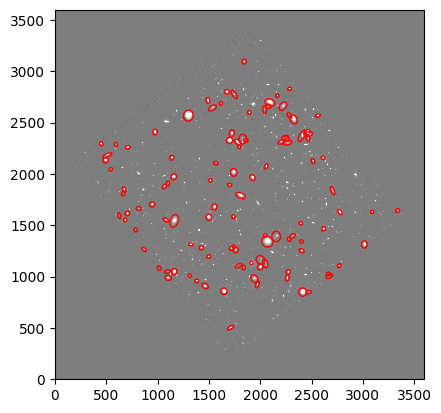

In [53]:

# Extract objects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# How many objects were detected
print("Number of objects detected:", len(objects))

# Plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot an ellipse for each larger object
for i in range(len(objects)):
    # Only plot ellipses around larger objects
    if objects['a'][i] > 5 and objects['b'][i] > 5:
        e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                    width=6*objects['a'][i],
                    height=6*objects['b'][i],
                    angle=objects['theta'][i] * 180. / np.pi)
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)

# Show the plot
plt.show()

Version 2: Aperture Photometry

In [54]:
# Perform aperture photometry
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

# Display photometry results for the first 10 objects
for i in range(10):
    print("Object {:d}: flux = {:.3f} +/- {:.3f}".format(i, flux[i], fluxerr[i]))


Object 0: flux = 0.031 +/- 0.177
Object 1: flux = 0.031 +/- 0.176
Object 2: flux = -0.024 +/- 0.003
Object 3: flux = 0.002 +/- 0.044
Object 4: flux = 0.012 +/- 0.112
Object 5: flux = -0.011 +/- 0.003
Object 6: flux = 0.029 +/- 0.171
Object 7: flux = -0.009 +/- 0.003
Object 8: flux = 0.048 +/- 0.219
Object 9: flux = 0.028 +/- 0.167
